In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
data.fetal_health.unique()

array([2., 1., 3.])

In [21]:
target = 'fetal_health'
predictors = list(data.columns)
predictors.pop(-1)

'fetal_health'

In [22]:
predictors

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

## Looking for any correlation between predictors

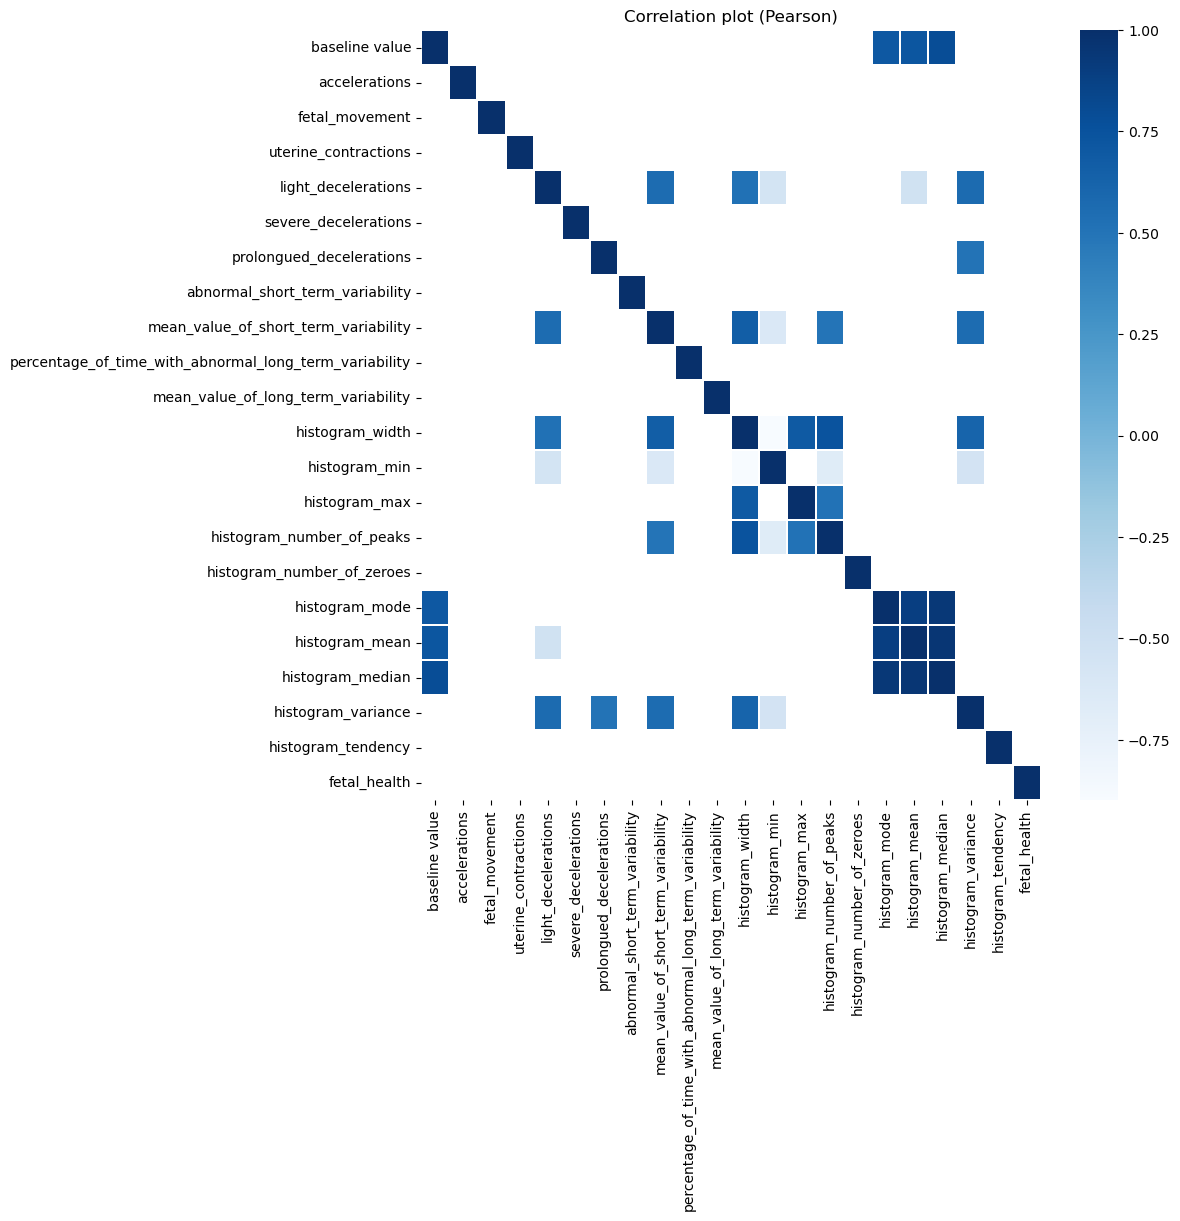

In [16]:
plt.figure(figsize = (10,10))
plt.title('Correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr[abs(corr)>0.5],xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

We need to remove columns which are having very high correlations.

* **Baseline_value**: Removing histogram mean mode and median(-4,-5,-6)
* **(-3)Histogram_Variance**: Also needs to be removed because having much high correlation between each other.

In [23]:
predictors

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [24]:
predictors.pop(-2)
predictors.pop(-2)
predictors.pop(-2)
predictors.pop(-2)

'histogram_mode'

In [25]:
predictors

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_tendency']

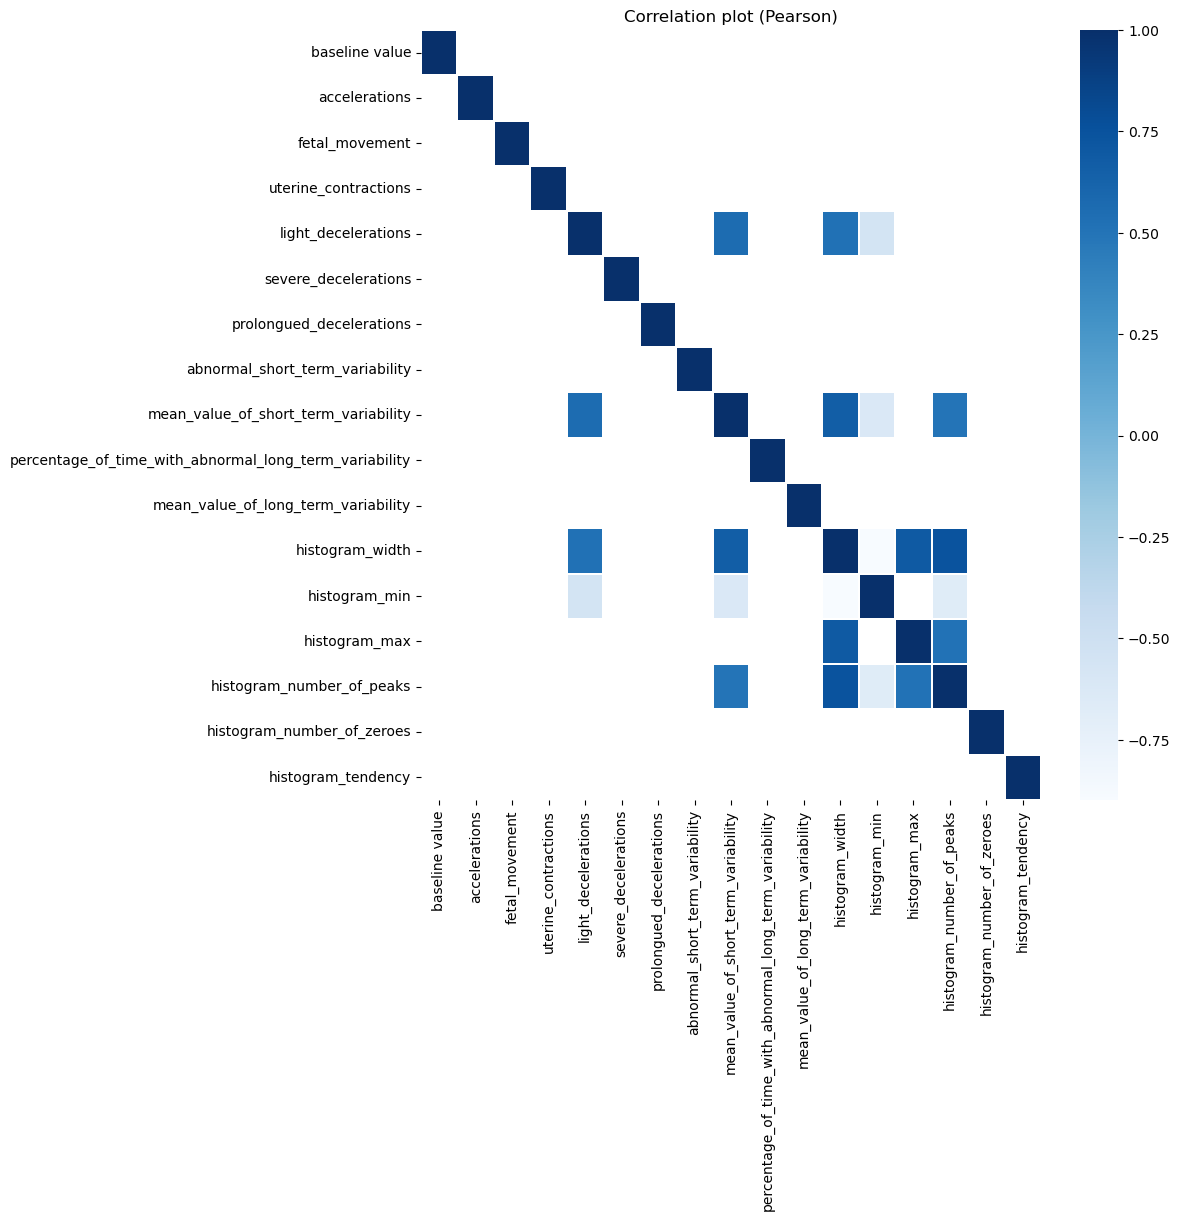

In [26]:
plt.figure(figsize = (10,10))
plt.title('Correlation plot (Pearson)')
corr = data[predictors].corr()
sns.heatmap(corr[abs(corr)>0.5],xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

* **Histogram_number_of_peaks**: Too much correlations with too many variables
* **Histogram_width**: Too much correlations with too many variables

In [27]:
predictors.pop(-3)
predictors.pop(-5)

'histogram_width'

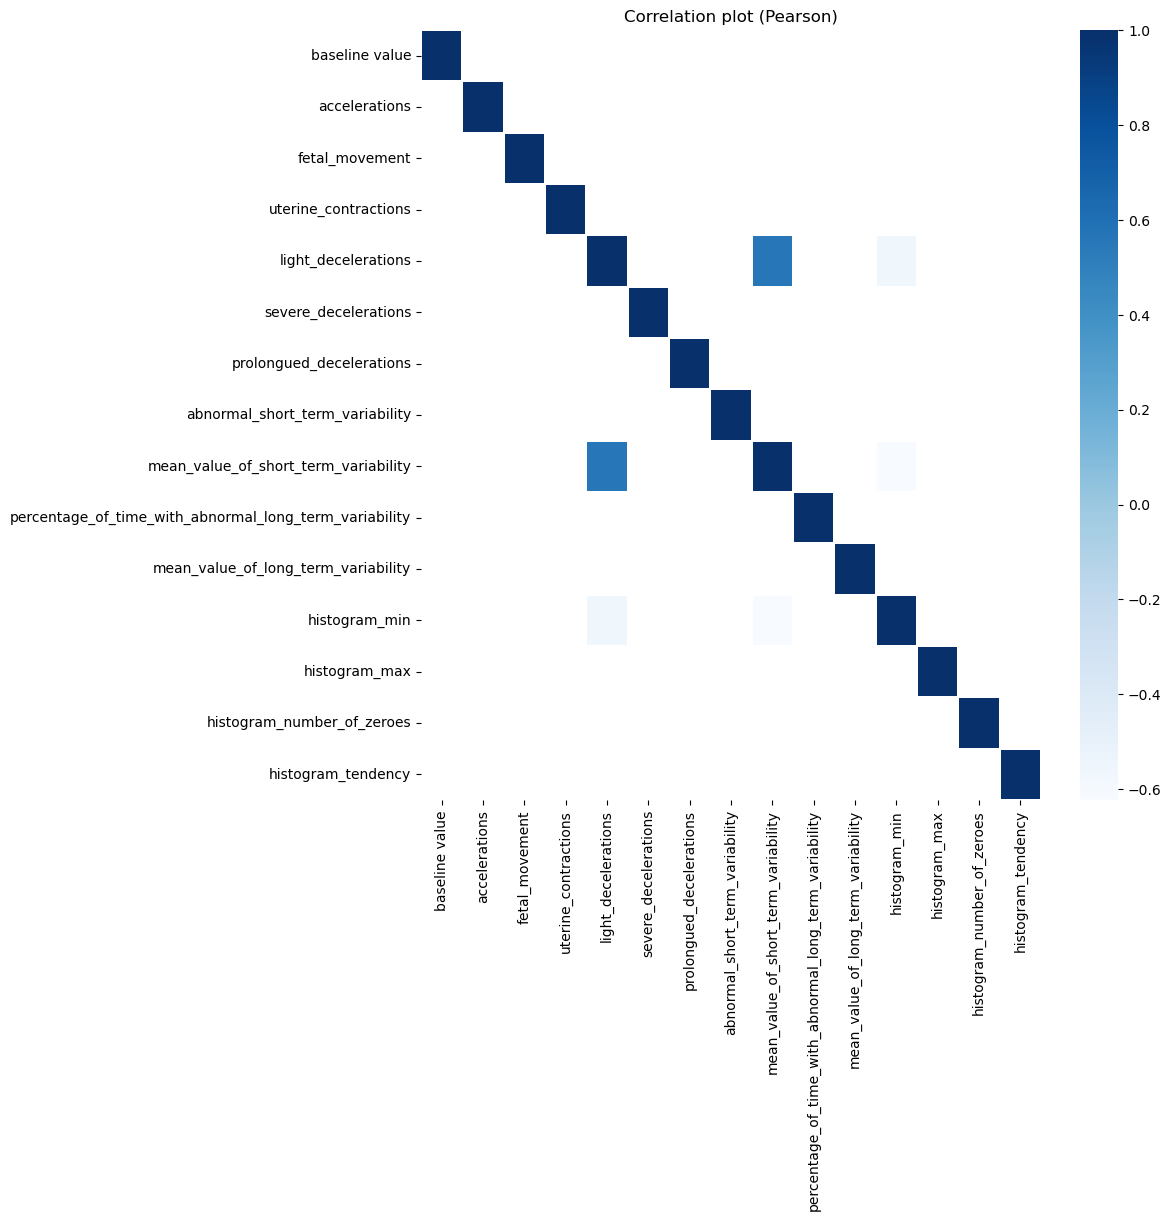

In [28]:
plt.figure(figsize = (10,10))
plt.title('Correlation plot (Pearson)')
corr = data[predictors].corr()
sns.heatmap(corr[abs(corr)>0.5],xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

In [29]:
predictors.pop(4)

'light_decelerations'

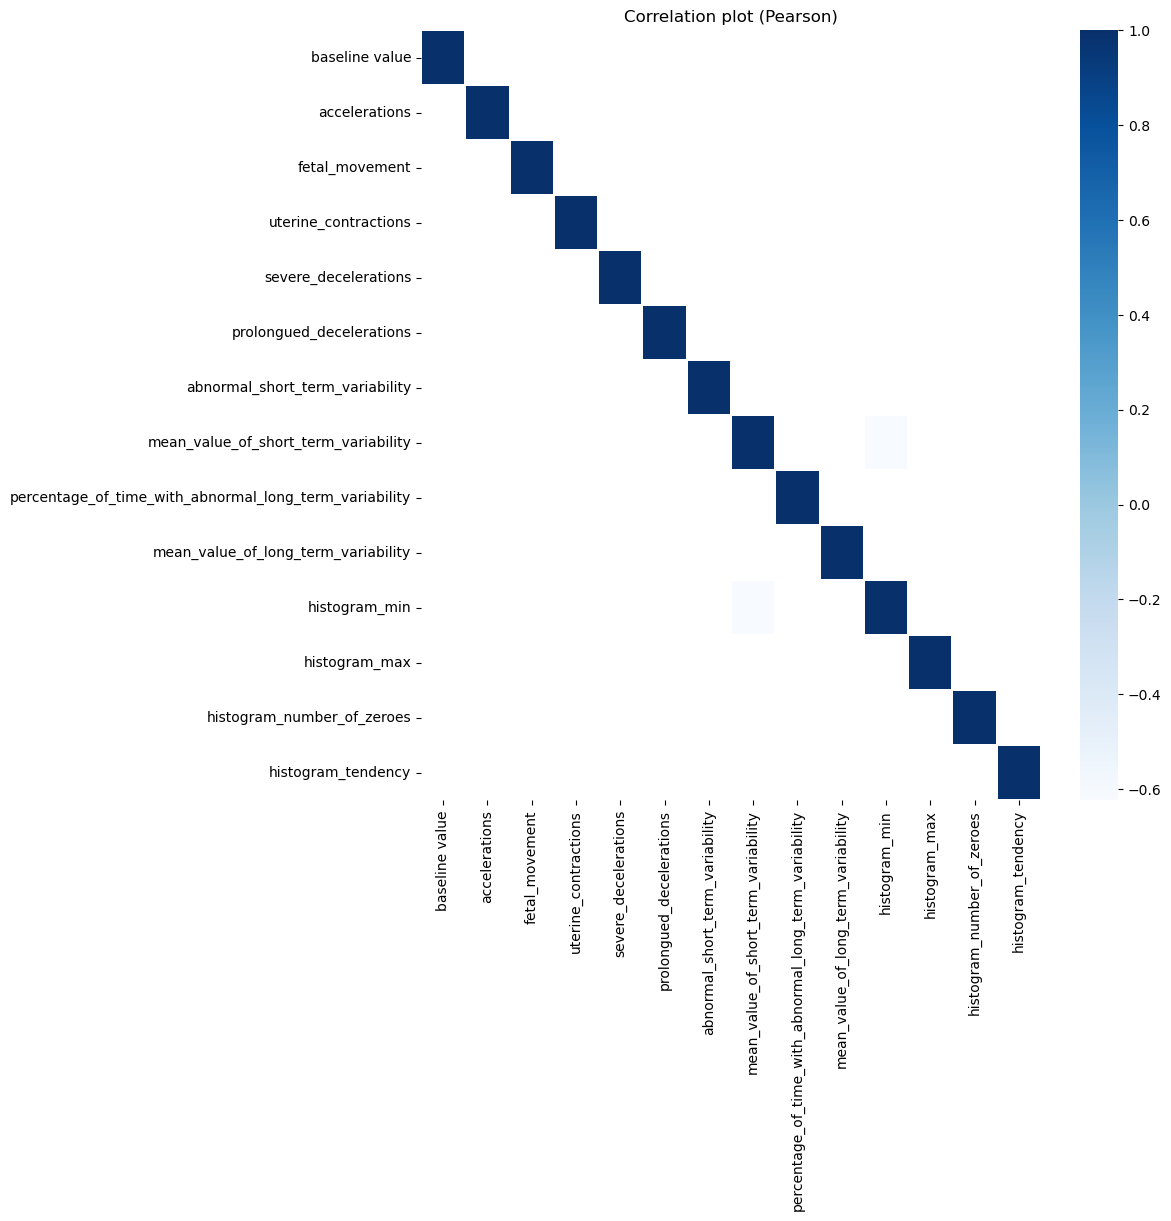

In [30]:
plt.figure(figsize = (10,10))
plt.title('Correlation plot (Pearson)')
corr = data[predictors].corr()
sns.heatmap(corr[abs(corr)>0.5],xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

Now we are clear for classification

In [33]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state = 40, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state= 40, shuffle=True )

### RandomForestClassifier

In [35]:
pd.set_option('display.max_columns', 100)
rfc_metric = 'gini'
num_estimator = 100
no_jobs = 4
max_rounds = 100
random_state = 40
opt_rounds = 1000 # To be adjusted based on best validation rounds
early_stop = 50 
verbose = 50 #  Print out metric result
clf = RandomForestClassifier(n_jobs=no_jobs, 
                             random_state=random_state,
                             criterion=rfc_metric,
                             n_estimators=num_estimator,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=40, verbose=False)

In [36]:
preds = clf.predict(valid_df[predictors])

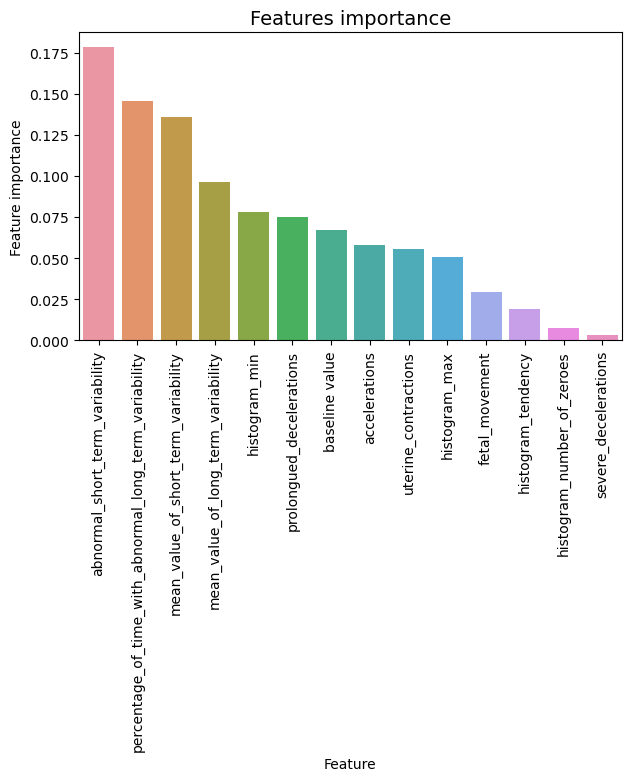

In [37]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

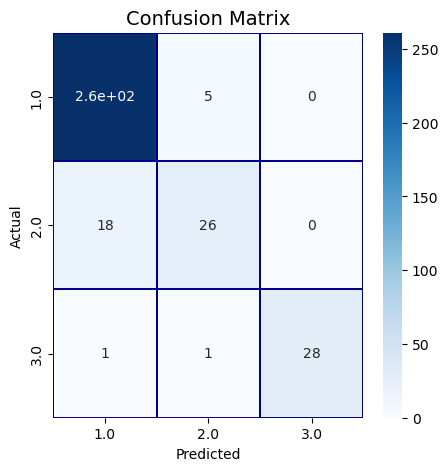

In [39]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            annot=True,ax=ax1,#When "annot" is set to True, each cell of the heatmap will be annotated with its corresponding value. This can be useful for quickly identifying the values of interest in the heatmap.
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### Type I and Type II error
**Null Hypothesis (H0)** - The transaction is not a fraud.
**Alternative Hypothesis (H1)** - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.
Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

* Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
* Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

In [49]:
print(classification_report(valid_df[target],preds))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       266
         2.0       0.81      0.59      0.68        44
         3.0       1.00      0.93      0.97        30

    accuracy                           0.93       340
   macro avg       0.91      0.84      0.87       340
weighted avg       0.92      0.93      0.92       340



### AdaBoostClassifier

In [50]:
clf = AdaBoostClassifier(random_state=random_state,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=num_estimator)
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=40)

In [51]:
preds = clf.predict(valid_df[predictors])

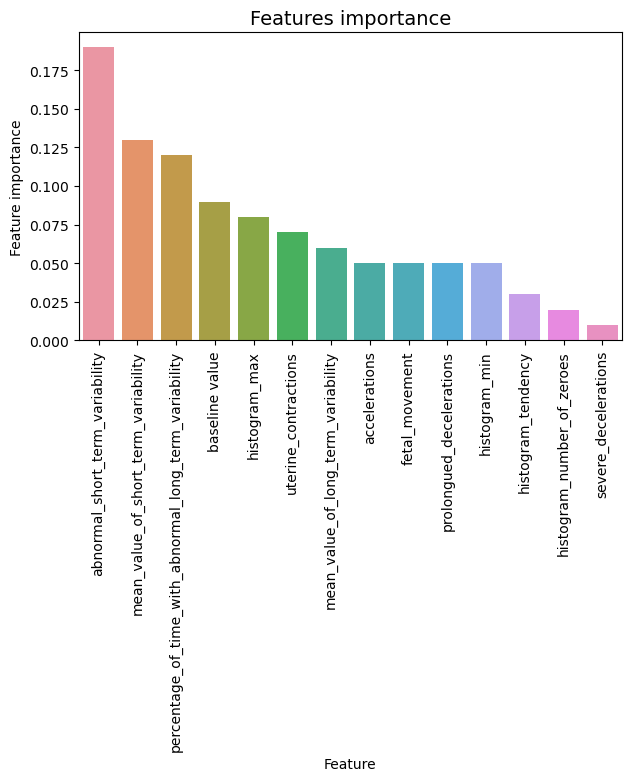

In [52]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

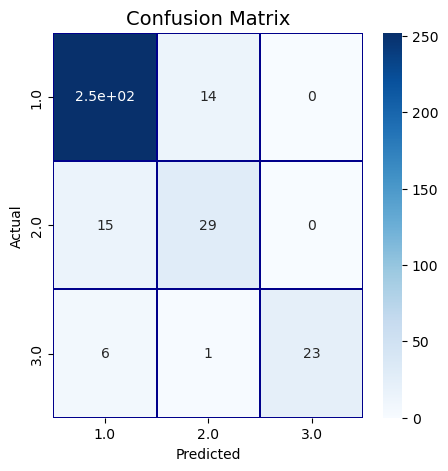

In [53]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [56]:
print(classification_report(valid_df[target],preds))

              precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       266
         2.0       0.66      0.66      0.66        44
         3.0       1.00      0.77      0.87        30

    accuracy                           0.89       340
   macro avg       0.86      0.79      0.82       340
weighted avg       0.90      0.89      0.89       340



The RandomForestClassifer provdies better results than AdaBoostClassifier